<a href="https://colab.research.google.com/github/santhuroyal07/British-Airways-REVIEWS-OF-CUSTOMER/blob/main/Santhosh_Reviews_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web scraping to gain company insights

In [2]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import requests
import pandas as pd
import nltk
import string
import seaborn as sns
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
!pip install requests

In [4]:
!pip install wordcloud

In [5]:
import requests

In [6]:
!pip install nltk

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
!pip install beautifulsoup4

In [9]:
from bs4 import BeautifulSoup

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [11]:
base_url ="https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I upgraded at check in to C...
1,✅ Trip Verified | I bought a return trip with...
2,✅ Trip Verified | Poor from start to finish. ...
3,✅ Trip Verified | Communication and customer s...
4,✅ Trip Verified | That was supposed to be my ...


In [ ]:
df.to_csv("BA_reviews.csv")

In [ ]:
import pandas as pd

csv_path = "BA_reviews.csv"
df1 = pd.read_csv(csv_path)
df1.reset_index(drop=True, inplace=True)

print(df1['reviews'])

0      ✅ Trip Verified |  I upgraded at check in to C...
1      ✅ Trip Verified |  I bought a return trip with...
2      ✅ Trip Verified |  Poor from start to finish. ...
3      ✅ Trip Verified | Communication and customer s...
4      ✅ Trip Verified |  That was supposed to be my ...
                             ...                        
995    ✅ Trip Verified |  San Francisco to London. Af...
996    ✅ Trip Verified |  Rome to London. One of the ...
997    ✅ Trip Verified |  Cologne to Gatwick in econo...
998    ✅ Trip Verified |  Tampa to Gatwick. I paid to...
999    ✅ Trip Verified | London Heathrow to Madrid. I...
Name: reviews, Length: 1000, dtype: object


In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df1.describe()

,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [ ]:
df1['reviews'] = df1['reviews'].str.strip()
df1['reviews']=df1['reviews'].str.lstrip('✅ Trip Verified |')
df1['reviews']=df1['reviews'].str.lstrip('Not Verified |')
df1['reviews']= df1['reviews'].str.lower()
print(df1)

     Unnamed: 0                                            reviews
0             0    i upgraded at check in to club europe seat 1...
1             1  i bought a return trip with ba, through webjet...
2             2  poor from start to finish. six months after pu...
3             3  communication and customer service non existen...
4             4  hat was supposed to be my flight but it was ca...
..          ...                                                ...
995         995  san francisco to london. after paying £4000 fo...
996         996  rome to london. one of the best european airli...
997         997  cologne to gatwick in economy class with an si...
998         998  ampa to gatwick. i paid to have my seats bumpe...
999         999  london heathrow to madrid. i travel from lhr r...

[1000 rows x 2 columns]


In [ ]:
#remove punctuation
df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')
print(df1['reviews'])

0        i upgraded at check in to club europe seat 1...
1      i bought a return trip with ba through webjet ...
2      poor from start to finish six months after pur...
3      communication and customer service non existen...
4      hat was supposed to be my flight but it was ca...
                             ...                        
995    san francisco to london after paying 4000 for ...
996    rome to london one of the best european airlin...
997    cologne to gatwick in economy class with an si...
998    ampa to gatwick i paid to have my seats bumped...
999    london heathrow to madrid i travel from lhr re...
Name: reviews, Length: 1000, dtype: object


<ipython-input-41-05b35ac04ac2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')


In [ ]:
# tokenize
print(df1.iloc[1,1])
df1['reviews'] = df1.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
print(df1.iloc[0,1])

i bought a return trip with ba through webjet australia last year i would fly from sydney to porto middle of june with no problem but i had to return earlier to australia so i requested a change in the dates from march to january i should point out that ba partners changed the details of the return flight many times that is not a problem the problem is that although i was flexible with the dates they refused to fly me back i had to buy a ticket from another company to travel to australia later i asked for a change of the return date to january of next year again that was turned down i will keep in mind this negative experience with ba when booking future trips
['i', 'upgraded', 'at', 'check', 'in', 'to', 'club', 'europe', 'seat', '1d', 'and', 'had', 'an', 'excellent', 'experience', 'with', 'ba', 'the', 'checkin', 'at', 'the', 'airport', 'was', 'very', 'quick', 'and', 'smooth', 'with', 'friendly', 'staff', 'once', 'through', 'the', 'fast', 'track', 'i', 'headed', 'for', 'the', 'gallerie

In [ ]:
df1['reviews'] = df1['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df1.head(20))

    Unnamed: 0                                            reviews
0            0  upgraded check club europe seat 1d excellent e...
1            1  bought return trip ba webjet australia last ye...
2            2  poor start finish six months purchasing ticket...
3            3  communication customer service non existent ma...
4            4  hat supposed flight cancelled 12 hours takeoff...
5            5  fear ba flight operated finnair business class...
6            6  flown ba five times western usa england always...
7            7  london heathrow istanbul start halfterm school...
8            8  jan 30th booked lastminute transatlantic fligh...
9            9  british airways gold guest list member lifetim...
10          10  another case reviewing british airways flights...
11          11  memorable day january 9th family embarked jour...
12          12  actually get fly ba cancelled flight 3 days no...
13          13  possibly worse checkin experience ever ever to...
14        

In [ ]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None



def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'


df1['polarity'] = df1['reviews'].apply(polarity_calc)


df1['tag'] = df1['polarity'].apply(tag_cal)


print(df1)

     Unnamed: 0                                            reviews  polarity  \
0             0  upgraded check club europe seat 1d excellent e...  0.686538   
1             1  bought return trip ba webjet australia last ye...  0.163636   
2             2  poor start finish six months purchasing ticket... -0.131944   
3             3  communication customer service non existent ma...  0.000000   
4             4  hat supposed flight cancelled 12 hours takeoff...  0.036111   
..          ...                                                ...       ...   
995         995  san francisco london paying 4000 flights cance...  0.000000   
996         996  rome london one best european airlines travel ...  0.236667   
997         997  cologne gatwick economy class silver status ba...  0.320000   
998         998  ampa gatwick paid seats bumped business class ... -0.033333   
999         999  london heathrow madrid travel lhr regularly br...  0.415385   

          tag  
0    Positive  
1    Po

In [ ]:
(df1.groupby('tag').size()/df1['tag'].count())*100

tag
Negative    34.2
Neutral      1.6
Positive    64.2
dtype: float64

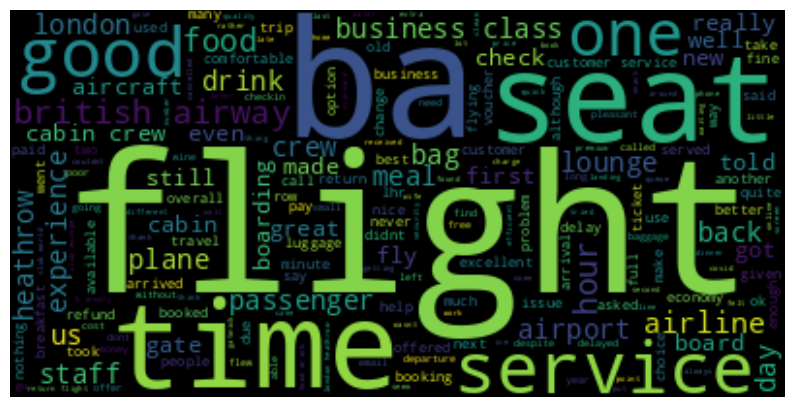

In [ ]:
text = " "
for ind in df1.index:
    if df1['tag'][ind] == "Positive":
        text = text + df1['reviews'][ind]

wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

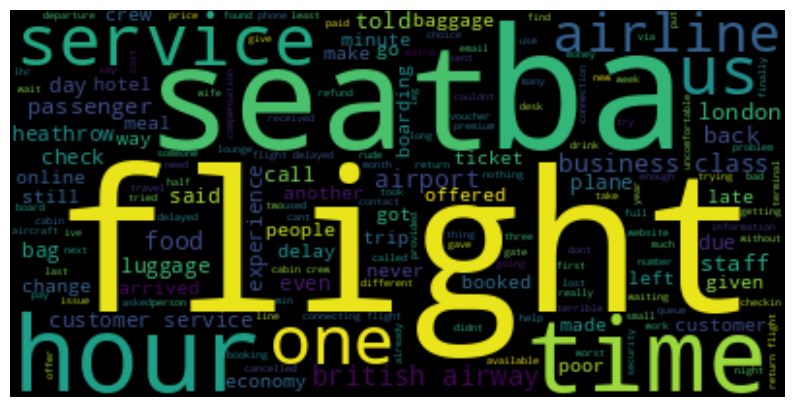

In [ ]:
text2= " "
for ind in df1.index:
    if df1['tag'][ind] == "Negative":
        text2 = text2 + df1['reviews'][ind]
wordcloud_negative = WordCloud().generate(text2)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

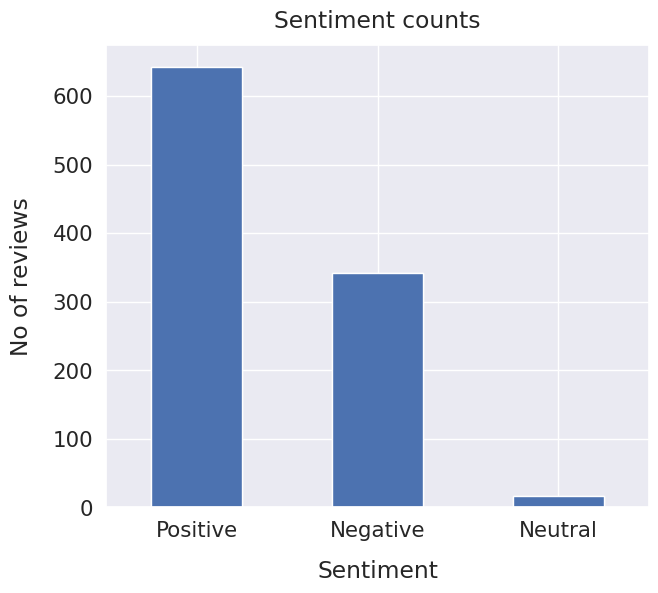

In [ ]:
df1['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
df1['tag'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("No of reviews", labelpad=14)
plt.title("Sentiment counts", y=1.02);